# Housing Prices Dataset

Data Cleansing:
Guiding Questions to answer: What are the factors affecting housing price?

We'll start by diving into the seasonality of housing sales, best months to sell a house, popular neighborhood regions, and which variables are correlated to Sales Price.

We'll look at key contributing factors, like:'dateSold', 'Age','LotArea','Neighborhood','CentralAir','FullBath',
'HalfBath','TotRmsAbvGrd','Fireplaces',
'GarageArea','PoolArea','SalePrice'

Then we'll take a deeper dive into the relationship between key variables and their effect on normal house sales and family house sales.

Once we have the key factors that affect sale price, we can predict what a new house might sell for on the market.

Specifically: We will predict what the sales price would be for a house that is only 5 years old, has 3 Full Bathrooms, 6 Rooms Above Ground, and a 900 sqft garage area.

Insights: 

In [235]:
#import libraries and aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import linear_model

In [3]:
 housing = pd.read_csv("train.csv")

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housing.CentralAir.replace(('Y', 'N'), (1, 0), inplace=True)

In [9]:
# Creata feature list for time sereis data
timeseries_features = ['YearBuilt','YrSold', 'MoSold']
housing[timeseries_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   YearBuilt  1460 non-null   int64
 1   YrSold     1460 non-null   int64
 2   MoSold     1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [171]:
housing['Age']=housing['YrSold']-housing['YearBuilt']

In [173]:
housing['dateSold'] = pd.to_datetime(housing['MoSold'].astype(str)+'/01/'+housing['YrSold'].astype(str))

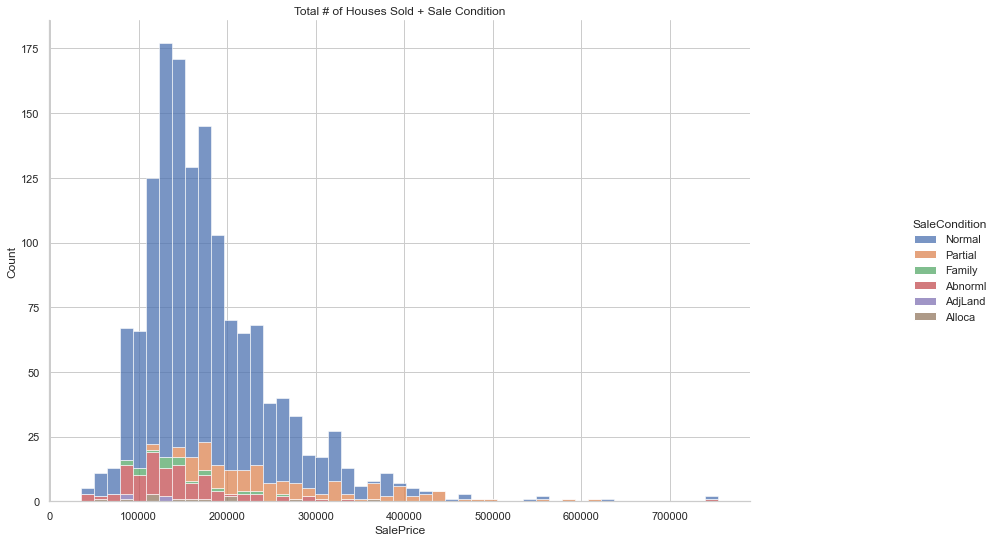

In [283]:
sns.displot(housing, x="SalePrice", hue="SaleCondition", multiple="stack", common_norm=False)
plt.title("Total # of Houses Sold + Sale Condition")
plt.gcf().set_size_inches(15, 8)

# SaleCondition: Condition of sale =

#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)

/Users/mike/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 58.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Quantity of Houses Sold with different Sale Conditions and their Sale Price')

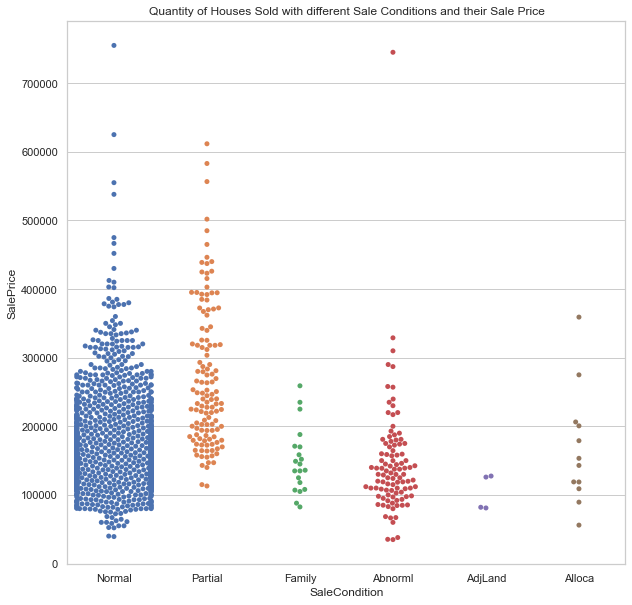

In [264]:
vf2= housing.loc[housing["SaleCondition"]=="Normal"]
sns.swarmplot(x ='SaleCondition', y ='SalePrice', data = housing)
plt.title('Quantity of Houses Sold with different Sale Conditions and their Sale Price')

# SaleCondition: Condition of sale

#        Normal	Normal Sale
#        Abnorml	Abnormal Sale -  trade, foreclosure, short sale
#        AdjLand	Adjoining Land Purchase
#        Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
#        Family	Sale between family members
#        Partial	Home was not completed when last assessed (associated with New Homes)

Text(0, 0.5, 'Quantity of Houses Sold')

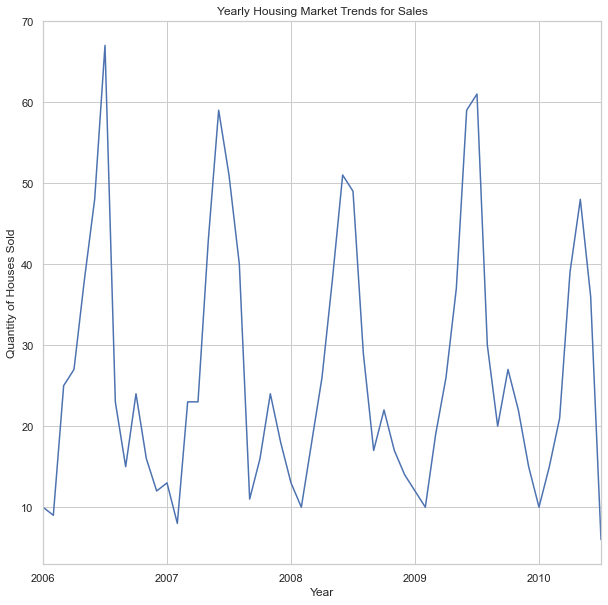

In [262]:
housing['dateSold'].value_counts().sort_index().plot()
plt.title('Yearly Housing Market Trends for Sales')
plt.xlabel("Year")
plt.ylabel("Quantity of Houses Sold")

(160000.0, 200000.0)

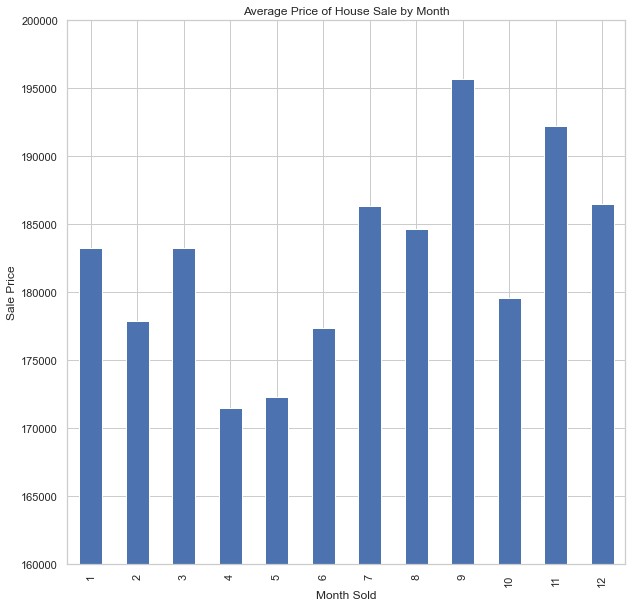

In [261]:
housing.groupby(housing.dateSold.dt.month)['SalePrice'].mean().plot(kind="bar")
plt.title('Average Price of House Sale by Month')
plt.xlabel("Month Sold")
plt.ylabel("Sale Price")
plt.ylim(160000,200000)

In [175]:
key_factors = housing[['dateSold', 'Age','LotArea','Neighborhood','CentralAir','FullBath',
                               'HalfBath','TotRmsAbvGrd','Fireplaces',
                               'GarageArea','PoolArea','SalePrice']]
key_factors.head()

,dateSold,Age,LotArea,Neighborhood,CentralAir,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,SalePrice
810,2006-01-01,32,10140,NWAmes,1,1,1,5,1,484,648,181000
996,2006-01-01,45,10659,NAmes,1,1,0,6,0,368,0,136500
664,2006-01-01,1,20896,Somerst,1,1,1,8,1,1134,0,423000
302,2006-01-01,5,13704,CollgCr,1,2,0,6,1,843,0,205000
141,2006-01-01,1,11645,CollgCr,1,2,0,7,0,660,0,260000


In [174]:
key_factors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 810 to 419
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateSold      1460 non-null   datetime64[ns]
 1   Age           1460 non-null   int64         
 2   LotArea       1460 non-null   int64         
 3   Neighborhood  1460 non-null   object        
 4   CentralAir    1460 non-null   int64         
 5   FullBath      1460 non-null   int64         
 6   HalfBath      1460 non-null   int64         
 7   TotRmsAbvGrd  1460 non-null   int64         
 8   Fireplaces    1460 non-null   int64         
 9   GarageArea    1460 non-null   int64         
 10  PoolArea      1460 non-null   int64         
 11  SalePrice     1460 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 180.6+ KB


Text(0.5, 1.0, 'Sales Price Box Plot by Neighborhood')

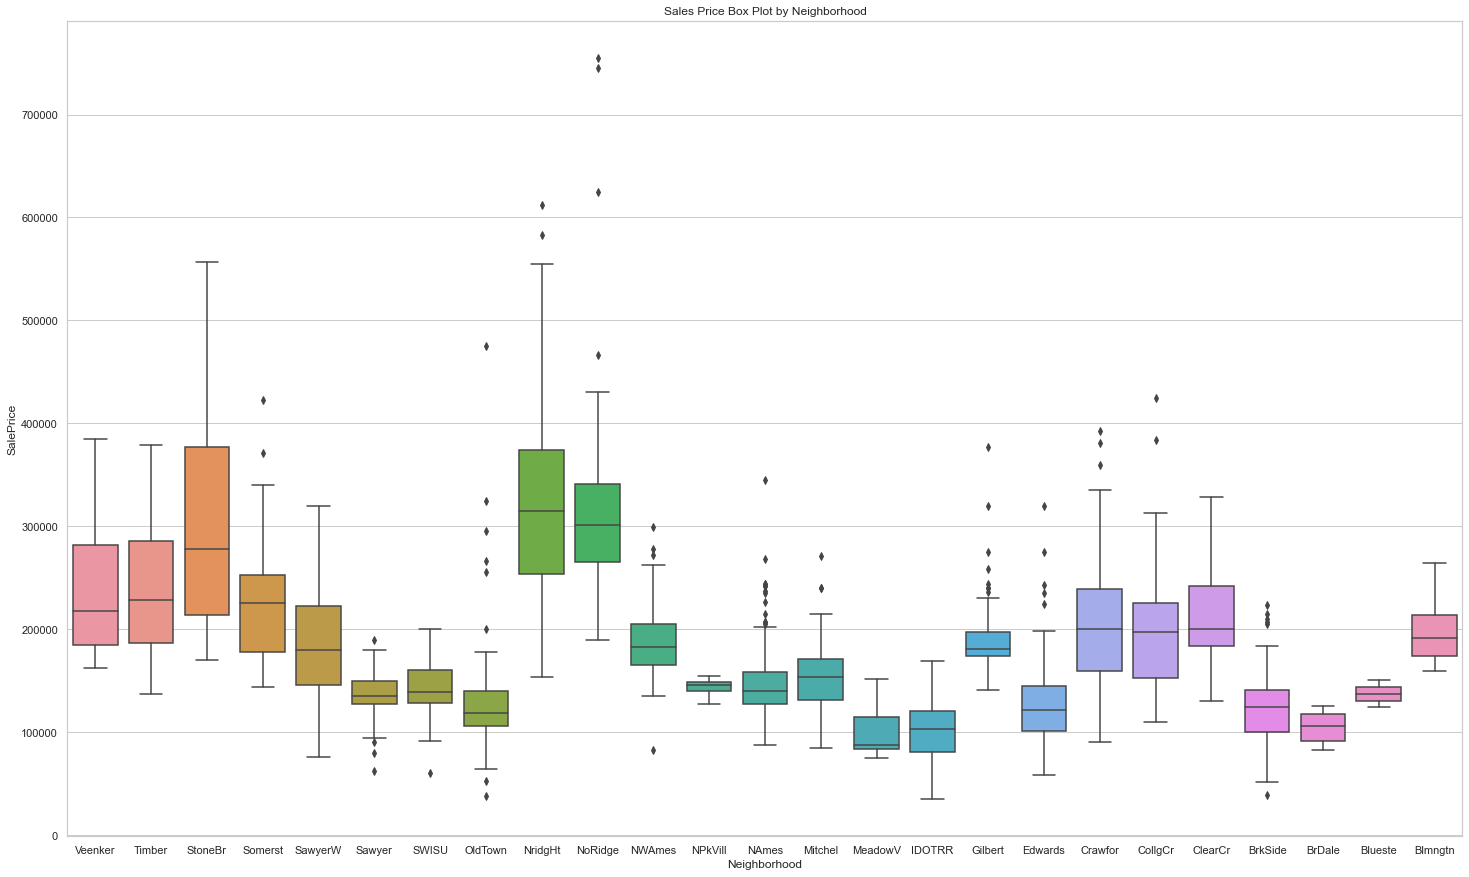

In [230]:
plt.figure(figsize=(25, 15))
my_order = key_factors.groupby(by=["Neighborhood"])["SalePrice"].median().iloc[::-1].index
sns.boxplot(x="Neighborhood",y="SalePrice",data=key_factors, order=my_order)
plt.title('Sales Price Box Plot by Neighborhood')

<AxesSubplot:title={'center':'Quantity of Houses Sold by Neighborhood'}, xlabel='Neighborhood', ylabel='Quantity of Houses Sold'>

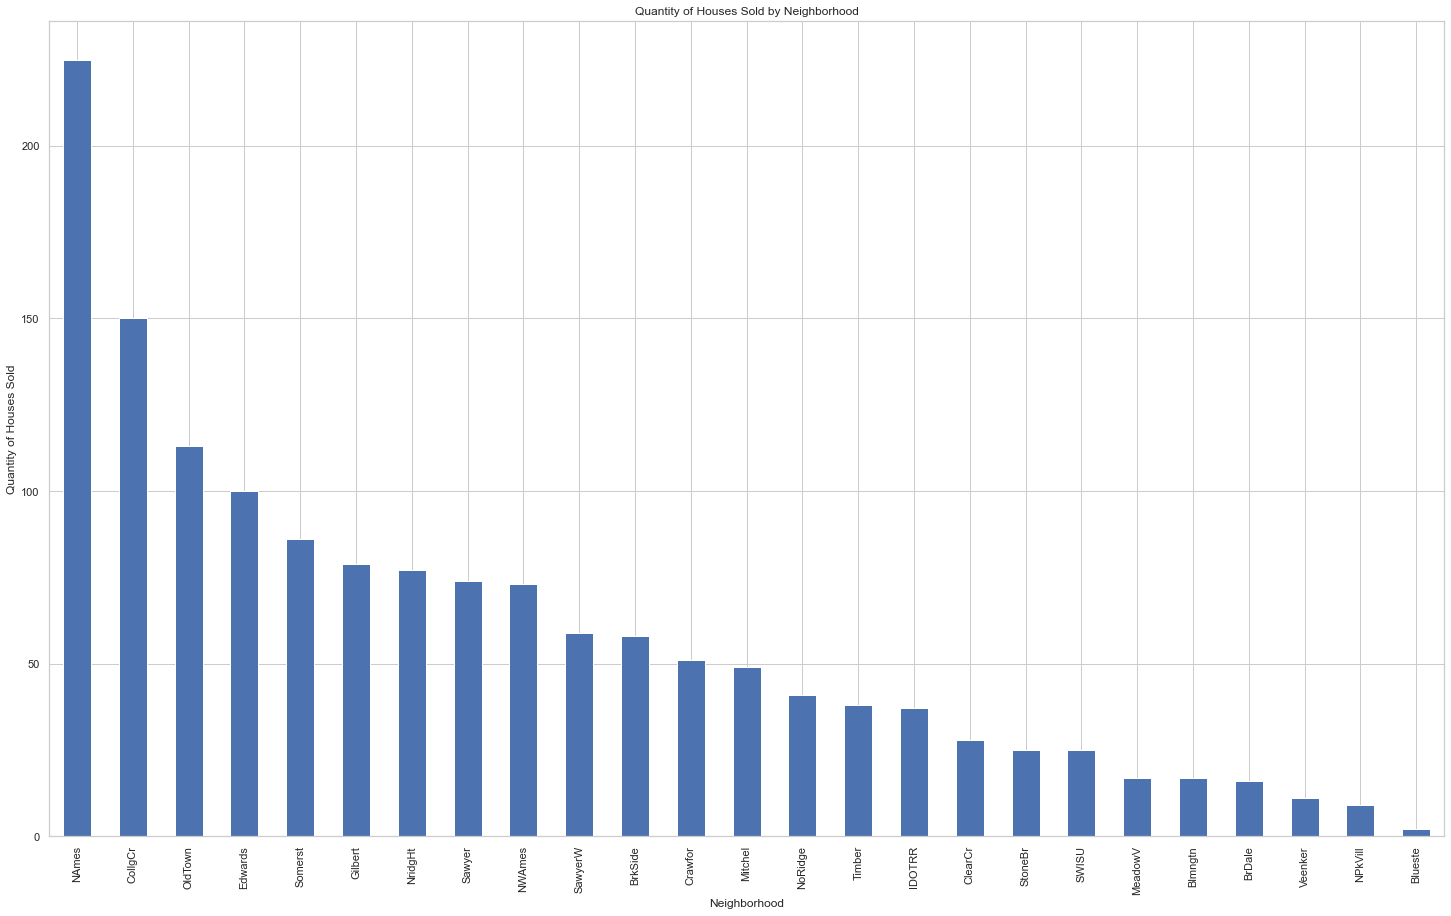

In [229]:
# sold by neighbor hood
#impact from sum, distribution, sasonality
#determines if location is a maIn factor to pricingsold
plt.figure(figsize=(25, 15))
plt.title('Quantity of Houses Sold by Neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Quantity of Houses Sold")
housing['Neighborhood'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'Correlation Heat Map of key_factors')

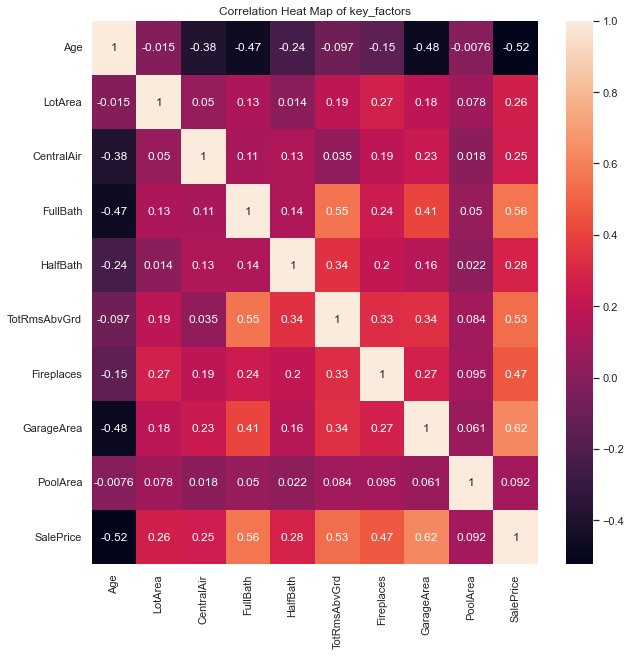

In [263]:
plt.figure(figsize=(10, 10))
sns.heatmap(key_factors.corr(), annot=True)
plt.title('Correlation Heat Map of key_factors')

Age looks to be negatively correlated to Sales rice, while Full Bath, Total Rooms Above Ground, and Garage Area are positively correlated to Sale Price. Let's take a deeper dive to see whether there are certain types of homes that we can see that tend to have a higher sale price by the correlation of these variables and vaious home sizes.

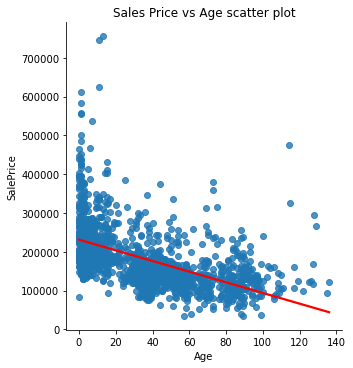

In [114]:
_ = sns.lmplot(x='Age', y='SalePrice', data=key_factors,
               ci=None, line_kws={"color": "red"}).set(title= 'Sales Price vs Age scatter plot')

Text(0.5, 1.0, 'Box plot full bath')

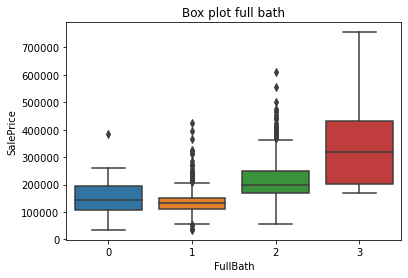

In [51]:
sns.boxplot(x=key_factors["FullBath"],y=key_factors["SalePrice"])
plt.title('Box plot full bath')

Text(0.5, 1.0, 'Box plot Sales Price vs Total Rooms Above Ground')

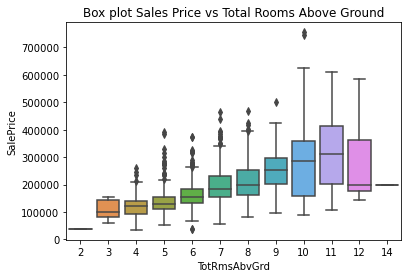

In [102]:
sns.boxplot(x=key_factors["TotRmsAbvGrd"],y=key_factors["SalePrice"])
plt.title('Box plot Sales Price vs Total Rooms Above Ground')

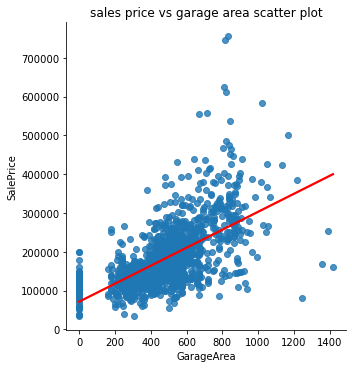

In [115]:
_ = sns.lmplot(x='GarageArea', y='SalePrice', data=key_factors,
               ci=None, line_kws={"color": "red"}).set(title= 'sales price vs garage area scatter plot')

In [90]:
housing.SaleCondition.unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'AdjLand', 'Alloca'],
      dtype=object)

In [248]:
reg = linear_model.LinearRegression()
reg.fit(key_factors[["Age","FullBath","TotRmsAbvGrd","GarageArea"]],key_factors.SalePrice)

LinearRegression()

In [249]:
reg.coef_

array([ -737.10964782, 15789.55945302, 16309.84012206,   123.25704567])

In [250]:
reg.intercept_

18546.75254310973

In [272]:
#predict what the sales price would be for a house that is only 5 years old, has 3 Full Bathrooms,
#6 Rooms Above Ground, and 900 sqft garage area:
Prediction= reg.predict([[5,3,6,900]])
Prediction

array([271020.26449632])

In [257]:
5*-737.10964782+3*15789.55945302+6*16309.84012206+900*123.25704567+18546.75254310973

271020.2644984297

In [275]:
#Calculating Margin of Error
import statsmodels.api as sm
from statsmodels.formula.api import ols

independent_variable = key_factors[['Age',
                        'FullBath',
                        'TotRmsAbvGrd',
                        'GarageArea']]
dependent_variable = key_factors['SalePrice']

independent_variable = sm.add_constant(independent_variable)
regression_model = sm.OLS(dependent_variable,independent_variable).fit()
regression_model.summary()

/Users/mike/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     530.4
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.92e-282
Time:                        13:52:39   Log-Likelihood:                -17887.
No. Observations:                1460   AIC:                         3.578e+04
Df Residuals:                    1455   BIC:                         3.581e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.855e+04   6790.507      2.731      0.006    5226.522    3.19e+04
Age           -737.1096     55.765    -13.218      0.000    -846.497    -627.722
FullBath      1.579e+04   3352.592      4.710      0.000    9213.129    2.24e+04
TotRmsAbvGrd  1.631e+04   1040.404     15.676      0.000    1.43e+04    1.84e+04
GarageArea     123.2570      7.520     16.391      0.000     108.506     138.008
==============================================================================
Omnibus:                      645.008   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7482.201
Skew:                           1.739   Prob(JB):                         0.00
Kurtosis:                      13.531   Cond. No.                     2.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:title={'center':'Regression Coefficients regression_model'}>

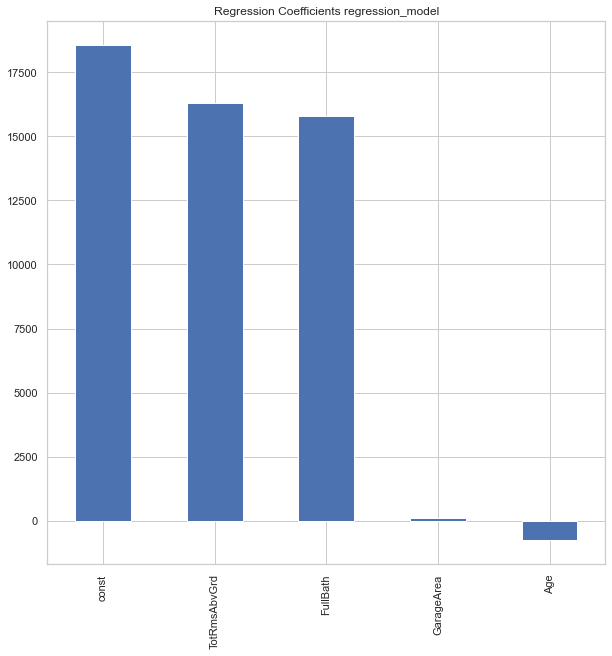

In [276]:
regression_model.params.sort_values(ascending=False).plot(kind='bar',
                                                          title="Regression Coefficients regression_model")